In [208]:
import matplotlib.pyplot as plt
import random
import numpy as np

### ADVERTISER: Company

The company has to choose prices dynamically.

In [209]:
class Company:
    def __init__(self, T, N, M, P):
        self.T = T  # Number of rounds
        self.N = N  # Number of types of products
        self.M = M  # Set of possible prices (LIST discrete set)
        self.P = P  # Production capacity budget (INT)

        self.products = []  # List to store products quantities
        self.prices = []  # List to store products prices

    def sell_products(self, product_list):
        for p in range(0, self.N):
            if product_list[p] and self.products[p] > 0:
                self.products[p] -= 1   # Sell one unit of the product
            elif product_list[p] and self.products[p] == 0:
                product_list[p] = False  # Mark as not available

        return product_list

STEP 0: random pricing

In [210]:
class Company_Random(Company):
    def __init__(self, T, N, M, P):
        super().__init__(T, N, M, P)    # Initialize the parent class

        # Initialize products_quantity randomy (ASK how to initialize how many products to produce)
        total_production = self.P + 1
        while total_production > self.P:
            self.products = [random.randint(1, self.P) for _ in range(self.N)]
            total_production = sum(self.products)

    def set_prices(self):
        # Set random prices for each product
        self.prices = [random.choice(self.M) for _ in range(self.N)]

    def sell_products(self, product_list):
        super().sell_products(product_list)  # Call the parent class method to sell products
        

STEP 1: UCB1 like algorithm

In [211]:
class Company_UCB1(Company):
    def __init__(self, T, N, M, P):
        super().__init__(T, N, M, P)

    def set_prices(self):
        pass  # Implement UCB1 pricing strategy

### BUYER: User

In [212]:
class User:
    def __init__(self, valuations):
        self.valuations = valuations  # Valuation list for each product type

    def buy_product(self, prices, products):
        # BUY iff self.valuation >= price and product is available
        return [
            valuation >= price and product > 0
            for price, valuation, product in zip(prices, self.valuations, products)
        ]

### INTERACTION

In [213]:
def plot_round_history(t, company, valuations, purchases, regret, cumulative_regret):
    print(f"Round {t + 1}:")                            # Print the round number
    print(f"Prices set by company: {company. prices}")  # Print the prices set by the company
    print(f"Product quantities: {company.products}")    # Print the quantities of products
    print(f"Buyer valuations: {valuations}")            # Print the valuations of the buyer
    print(f"Products bought: {purchases}")              # Print the products bought by the buyer
    print(f"Regret for this round: {regret}")           # Print the regret for this round
    print(f"Cumulative regret: {cumulative_regret}")    # Print the cumulative regret
    print("-" * 30)

In [214]:
def plot_regret_history(rounds, regrets, linear_regret):
    plt.figure(figsize=(10, 6))
    plt.plot(rounds, regrets, marker='o', label='Cumulative Regret')                        # Plot cumulative regret
    plt.plot(rounds, linear_regret, linestyle='--', color='red', label='Linear Regret')     # Plot linear regret
    plt.title('Cumulative Regret vs Linear Regret Over Time')
    plt.xlabel('Round')
    plt.ylabel('Regret')
    plt.legend()
    plt.grid()
    plt.show()

In [215]:
def simulate_rounds(num_rounds, company, user):
    cumulative_regret = 0  # Initialize cumulative regret
    cumulative_regrets = []  # List to store cumulative regret for each round
    rounds = []  # List to store round numbers
    linear_regrets = []  # List to store linear regret for comparison

    # Define the slope for linear regret (maximum possible regret per round)
    max_price = max(company.M)
    min_price = min(company.M)
    regret_slope = max_price - min_price

    for round_num in range(num_rounds):
        # Step 1: Company sets prices for products
        company.set_prices()

        # Step 2: User has valuations for products
        valuations = user.valuations

        # Step 3: User decides which products to buy
        purchases = user.buy_product(company.prices, company.products)

        company.sell_products(purchases)  # Company decrements product quantities

        # Calculate regret (difference between optimal and actual revenue)
        optimal_revenue = sum(min(valuation, max_price) for valuation in valuations)
        actual_revenue = sum(price if purchase else 0 for price, purchase in zip(company.prices, purchases))
        regret = optimal_revenue - actual_revenue
        cumulative_regret += regret

        # Store data for plotting
        cumulative_regrets.append(cumulative_regret)
        rounds.append(round_num + 1)
        linear_regrets.append(regret_slope * (round_num + 1))

        # Print round details (pass correct arguments)
        plot_round_history(round_num, company, valuations, purchases, regret, cumulative_regret)

    # Plot cumulative regret and linear regret
    plot_regret_history(rounds, cumulative_regrets, linear_regrets)

Round 1:
Prices set by company: [10, 30, 20, 10, 20, 10]
Product quantities: [52, 221, 37, 136, 181, 232]
Buyer valuations: [15, 15, 35, 25, 5, 10]
Products bought: [True, False, True, True, False, True]
Regret for this round: 50
Cumulative regret: 50
------------------------------
Round 2:
Prices set by company: [10, 10, 20, 30, 30, 20]
Product quantities: [51, 220, 36, 136, 181, 232]
Buyer valuations: [15, 15, 35, 25, 5, 10]
Products bought: [True, True, True, False, False, False]
Regret for this round: 60
Cumulative regret: 110
------------------------------
Round 3:
Prices set by company: [10, 20, 30, 10, 30, 10]
Product quantities: [50, 220, 35, 135, 181, 231]
Buyer valuations: [15, 15, 35, 25, 5, 10]
Products bought: [True, False, True, True, False, True]
Regret for this round: 40
Cumulative regret: 150
------------------------------
Round 4:
Prices set by company: [10, 10, 20, 20, 10, 20]
Product quantities: [49, 219, 34, 134, 181, 231]
Buyer valuations: [15, 15, 35, 25, 5, 10]


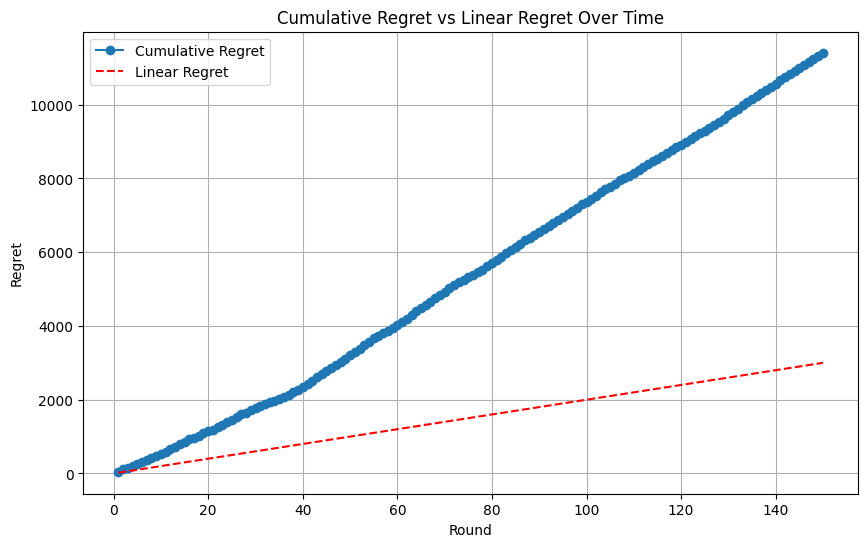

In [216]:
#PARAMETERS
T = 150             # Number of rounds
N = 6               # Number of product types
M = [10, 20, 30]    # Set of possible prices (discrete set)
P = 1000             # Production capacity budget
valuations = [15, 15, 35, 25, 5, 10]  # User valuations

company = Company_Random(T=T, N=N, M=M, P=P)    # Create a random company instance
user = User(valuations)                         # Create a user instance with valuations

# Simulate the rounds
simulate_rounds(company.T, company, user)